# This boston house pricing problem is a REGRESSION Problem:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# importing matplotlib inline for inline visualization/display.

## Loading the dataset. It's already present in the scikit learn library:

In [31]:
from sklearn.datasets import load_boston

In [32]:
boston = load_boston() # The boston data set has been loaded into this variable as a dictionary.

d:\ANURAG\PROJECTS\bostonhousepricing\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [33]:
print(boston.keys(), '\n') # keys present in our loaded dictionary.
print(boston['feature_names'], '\n') # features of our dataset.
print(boston['DESCR']) # In the "DESCR" key we have the description of the dataset as the value.
# We can read all the information about the dataset using the description.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to

In [34]:
print(boston['target']) # These are the target values which we have to find. i.e. our Y_i(s)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [35]:
boston.data # This is the data set.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# EDA: (Exploratory data analysis)

In [36]:
# Lets create a combined dataset (which will be a dataframe) out of the given dataset which is in the form of dictionary.
dataset = pd.DataFrame(boston.data, columns=boston.feature_names) # Loading the data set and giving it column names.

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
# We still dont' have our Y_i in the dataframe. (The price column which we need to predict.)
# It is present in the value of the 'target' key of the boston dictionary.
# Let's add it to the df by adding another column:
dataset['PRICE'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Now we will perform some analysis:

In [38]:
dataset.info() # This will give you some basic info, like is there any missing value, type, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
## Summarizing the stats of the dataset:
dataset.describe()
# This will tell you all the basic stats of theh dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
## Checking if there are any missing values:
dataset.isnull() # If in any place the value is missing it'll print true overthere.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
# As you can see above we cannot see all the rows above therefore we'll use the following trick:
dataset.isnull().sum()
# This will tell you the total # of missing values for each feature.
# As we can see here # of missing value is 0.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [43]:
# Now the EDA:
# Since are problem is a REGRESSION type,
#..therefore it is profitable for us to first to try to find some correlation.

dataset.corr() # This is the code to find correlation.
# This .corr() by default uses pearsons correlation technique to find the correlation.
# You have read about this in aaic notes in pg-22. It is use to measure relationship b/w two random variables.
# It gives is value from [-1,1]. The more it is towards 1 or -1, more the relation.
# If it is near 0 or simply 0 then less and no relation respectively.
# -sign means they are inversly proportional.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Now here we need to check two types of correlation-
1. Correlation b/w independent feature.
2. Correlation b/w independent and the dependent (target / output / what_we_are_finding) feature.

If there is high a correlation b/w independent feature then we can remove one of those feature. Since both are related so we can work with only one. If there is a high correlation b/w independent feature and dependent (target) feature then that independent feature is perhaps important.

In [ ]:
import seaborn as sns
sns.pairplot(dataset)
# Since there are two many feature. The plots will be small and difficult to understand,
#..therefore it is made just to see how it looks.

Text(0, 0.5, 'House Price')

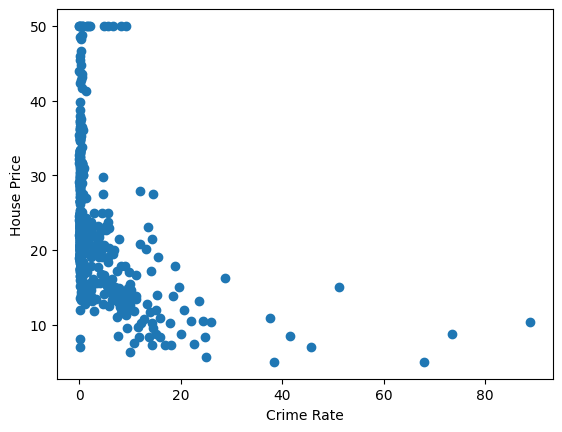

In [44]:
# Lets see the plot between independent and dependent i.e. CRIM and PRICE. (If you don't know what CRIM is then read the inf DESCR about the dataset in the beginning of this notebook.)
plt.scatter(dataset['CRIM'], dataset['PRICE'])
# Adding labels to make the plot readable.
plt.xlabel('Crime Rate')
plt.ylabel('House Price')

**Observations**: As you can see where the crime rate is lower the prices went up.

In [ ]:
# Lets plot b/w RM and PRICE:
plt.scatter(dataset['RM'], dataset['PRICE'])
plt.xlabel('Avg. Number of Rooms')
plt.ylabel('House Price')

**Observations**: As you can see where the # rooms is higher the prices went up.

In [ ]:
# Lets plot a regression plot for the above two features:
sns.regplot(x="RM", y="PRICE", data=dataset)

In [ ]:
# In the correlation table we can also see that there is a corre b/w LSTAT and PRICE, so lets plot them:
sns.regplot(x="LSTAT", y="PRICE", data=dataset)

**Observations**: As you can see where the LSTAT is lower the prices went up. (So there's a negative relation)

In [ ]:
# Lets plot for the PTRATIO:
sns.regplot(x="PTRATIO", y="PRICE", data=dataset)

**Observations**: As you can see where the pupil-teacher ratio is lower the prices went up. (So there's a negative relation)

# Now we will create our MODEL:
### But before that we need to perform multiple steps:
1. Prepare independent and dependent features.
2. Train-Test split.
3. Standardizing the dataset. (Since all the features are recorded in different units, and also we need to do the gradient descent in linear regression.) (We standardize only for the training set.)
4. and a few more tasks.

In [45]:
# Dividing into independent and dependent (which we are finding) features.
# .iloc[] acts as a slicer of dataframes.

x = dataset.iloc[:, :-1] # Before the comma we slice for rows, after the comma we slice for cols.
y = dataset.iloc[:, -1] # Here we only want the last col so no need of slicing, used the index.

In [46]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

Now we have divided the dataset into independent and dependent dataset.

In [48]:
# Now we do the Train Test Split: (here we split the dataset into training and test set.)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

# This imported function helps us to split the data.
# "test_size = 0.3" means the size of our test set should be 30% of our dataset. (rest 70% will be our train set obvi)
# "random_state = 42" will just be used as a seed by random number generator.

In [49]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [50]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 354, dtype: float64

As you can see our training set is 70% of our dataset. And the size of x_train and y_train is the same.

In [51]:
# Standardizing the dataset:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Here we are initializing the fuction.
# This imported function helps in standardizing.

In [52]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#### Why are we using fit_transform for training data and only transform for our test data?

First of all what is the formula of standardization? Its This: 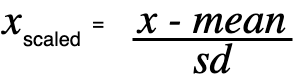

So, We are doing this because when we use fit_transform(), it calculates mean and variance for each of the feature of our training dataset and then standardize by applying the formula.
What only transform() does is that it uses the mean and variance calculated by the fit_transform() on the training data and uses it to do the standardization on test dataset.<br>
**So, why do we do that?** We do that because if we use fit_transform() again on our test data then it'll calculate mean and variance for our test data separately and then our unseen/secret/untouched data will be exposed and become known which we obvi don't want. Therefore we use the same mean and variance of train data and standardize the test data.

Refer this link to understand the same thing clearly: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [53]:
# Watch this cell after completing this whole notebook.
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

# We are creating this pickle so that we can use this method of standardizing for the inputs..
#..that we get in out hosted web app. This pickle will be used in VS Code.

In [54]:
x_train # Standardized

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [55]:
x_test # Standardized

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

# Model Training:

In [56]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression() # Initializing the function.

# Importing linear regression and initializing it.

In [57]:
regression.fit(x_train, y_train) # Training the model.
# Finds a hyper plane that best fits the training data (thats what lr. reg. do).

LinearRegression()

In [58]:
print(x.shape)
# We are giving 2-d shaped data. So when we'll be giving new inputs to it in the real world..
#..we need to give the data to it in 2-d.

(506, 13)


In [59]:
# Printing the coefficients:
print(regression.coef_)

# As we know the eqn of hyperplane is Wx+b=0 where 'w' is a vector, and that is the coefficient..
#..which we are printing over here. As you can see its size is equal to the # features we have.

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [60]:
# Printing the Intercept: (The 'b' of Wx+b=0)
print(regression.intercept_)

23.01581920903956


In [61]:
# On which parameters the model has been trained?
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

# Predicting target values using 'Test' Data:

In [62]:
reg_pred = regression.predict(x_test)
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

### Testing the prediction: (using some plots)

Text(0, 0.5, 'Predicted Price')

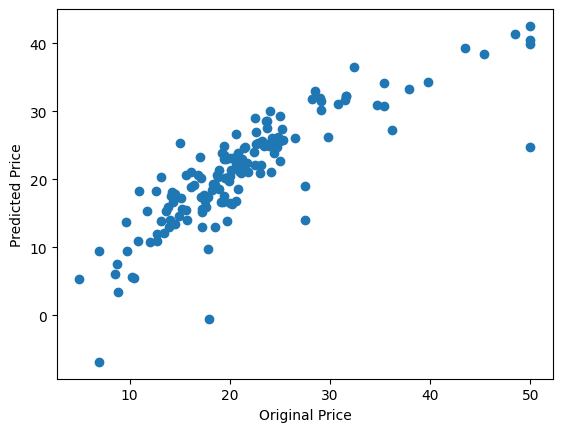

In [63]:
# We'll make a scatter plot of predicted values and actual given target values.
plt.scatter(y_test, reg_pred)
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')

# Technically these both x and y values should be same if the predictions are correct.
# Therefore the plot that we get should be linear.

**Observation**: As we can see the plot is pretty much linear. Hence, our predictions are quite good (not bad).

In [64]:
# Now lets calculate the error: (i.e. diff b/w original values and predicted values)
# We call them residuals:
residuals = y_test - reg_pred
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

In [ ]:
# Lets plot these residuals:
sns.distplot(residuals, kde = True, hist=True)

# kde = kernal density estimate, it gives us the line in the plot. This is by default true so no need to write.
# hist = histogram, it gives us those bars. This is also true by default so no need to write.

**Observation**: This plot looks like a normal distribution. <br>
We can see that most of the error is present in the range of -10 to 10.

# Performance Metrics:
We'll check the performance of our model:

In [65]:
# Mean Squared Error and Mean Absolute Error:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred)) # Always put y_test first in all the metrics calculation steps then the predicted values.
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred))) # Root mean sq error.

3.1627098714574053
21.517444231177215
4.638689926172821


## Another performance metrics: R Square and Adjusted R Square

### R Square:

Formula: **R^2 = 1 - SSR/SST**
<br><br>
where:<br>
R^2 is coefficient of determination. (R Square)<br>
SSR = Sum of squares of residuals.<br>
SST = Total sum of squares. (SST = summation(y_i - y_avg)), where: y represents original values

In [66]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)
# R square shows how well the data fits in the regression model. The high, the better.

0.7112260057484932


**Observation**: We can see here since r^2 value is 0.7112 that means our data fits 71.12% perfectly on our regression model.

### Adjusted R Square:
Formula: Adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]

where:<br><br>
R^2 = R Square<br>
n = Number of observations<br>
k = Number of predictor variables (i.e. number of features used for prediction)

#### Adjusted R Square will always be less than R Square.

In [67]:
# There is no function to calculate adjusted r square so we need to calculate by our own:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6840226584639308

# Prediction on Brand New Data:

In [68]:
# Lets take a data point from the data set itself and pretend its a new data.
print(boston.data[0])
print(boston.data[0].shape) # 1-D

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(13,)


We can't use this type of data because its not in the correct shape as we used for model training. This data point is in 1-D and we need a 2-D data point to give input to the model. Therefore, we'll reshape this datapoint in 2-D

In [69]:
print(boston.data[0].reshape(1,-1))
print(boston.data[0].reshape(1,-1).shape) # It's shape is now in 2-D

# Now the data has become 2-dimensional and hence we can use this in the model.
# In layman's terms: Basically one extra pair of square brackets has been added.

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
(1, 13)


In [70]:
# Now lets predict the target value for the above data point.
regression.predict(boston.data[0].reshape(1,-1))

array([-45.64344024])

**Observation**: Why are we getting -ve value here? This is because our input isn't standardized.

In [71]:
# Lets standardized our input:
scaler.transform(boston.data[0].reshape(1,-1))

# Now this datapoint is standardized.

d:\ANURAG\PROJECTS\bostonhousepricing\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [72]:
# Lets predict the value for it:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

d:\ANURAG\PROJECTS\bostonhousepricing\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

# Pickling The Model file for Deployment:
We need these models to deploy our projects. So there should be a way through which i could use this model out side of this notebook. That process of loading this model into another file (which is in byte streams) is called pickling. So that we can use this model outside of this notebook.

In [73]:
import pickle # Helps us in pickling

In [74]:
pickle.dump(regression, open('regmodel.pkl','wb'))

Here we created a file called 'regmodel.pkl' and we're opening it in 'wb' (write byte) mode so that if it isn't present already then it'll create it and load the model into it in byte streams. So basically we are dumping our model (whose name in this notebook is regression) into the file named regmodel.pkl so that we can use it out side of our notebook for deployment of our project.

In [75]:
# Opening the pickled model:
pickled_model = pickle.load(open('regmodel.pkl','rb')) # rb = read byte

In [76]:
# Prediction from the pickled model:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

# As you can see the predicted value is same for the datapoint which we used earlier.

d:\ANURAG\PROJECTS\bostonhousepricing\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

# Now we will make a project using this model and deploy it.